# Unit 5: Scraping Data#



In [33]:
from shared import display_unit_toc
display_unit_toc('notebook.ipynb')

# Table of Contents

* [Unit 5: Scraping Data](#Unit-5:-Scraping-Data)

Install [Google Chrome](https://www.google.com/chrome/) and [ChromeDriver](http://chromedriver.chromium.org)

In [6]:
import requests
import re
import time
from random import random
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common import keys
from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Chrome('/Users/gfiddyment/bin/chromedriver')


In [11]:
url = 'https://www.basketball-reference.com/wnba/years/2018.html'
# driver.get(url)
tables = driver.find_elements_by_tag_name('table')
len(tables)

tables = driver.find_elements_by_tag_name('table')
len(tables)


60

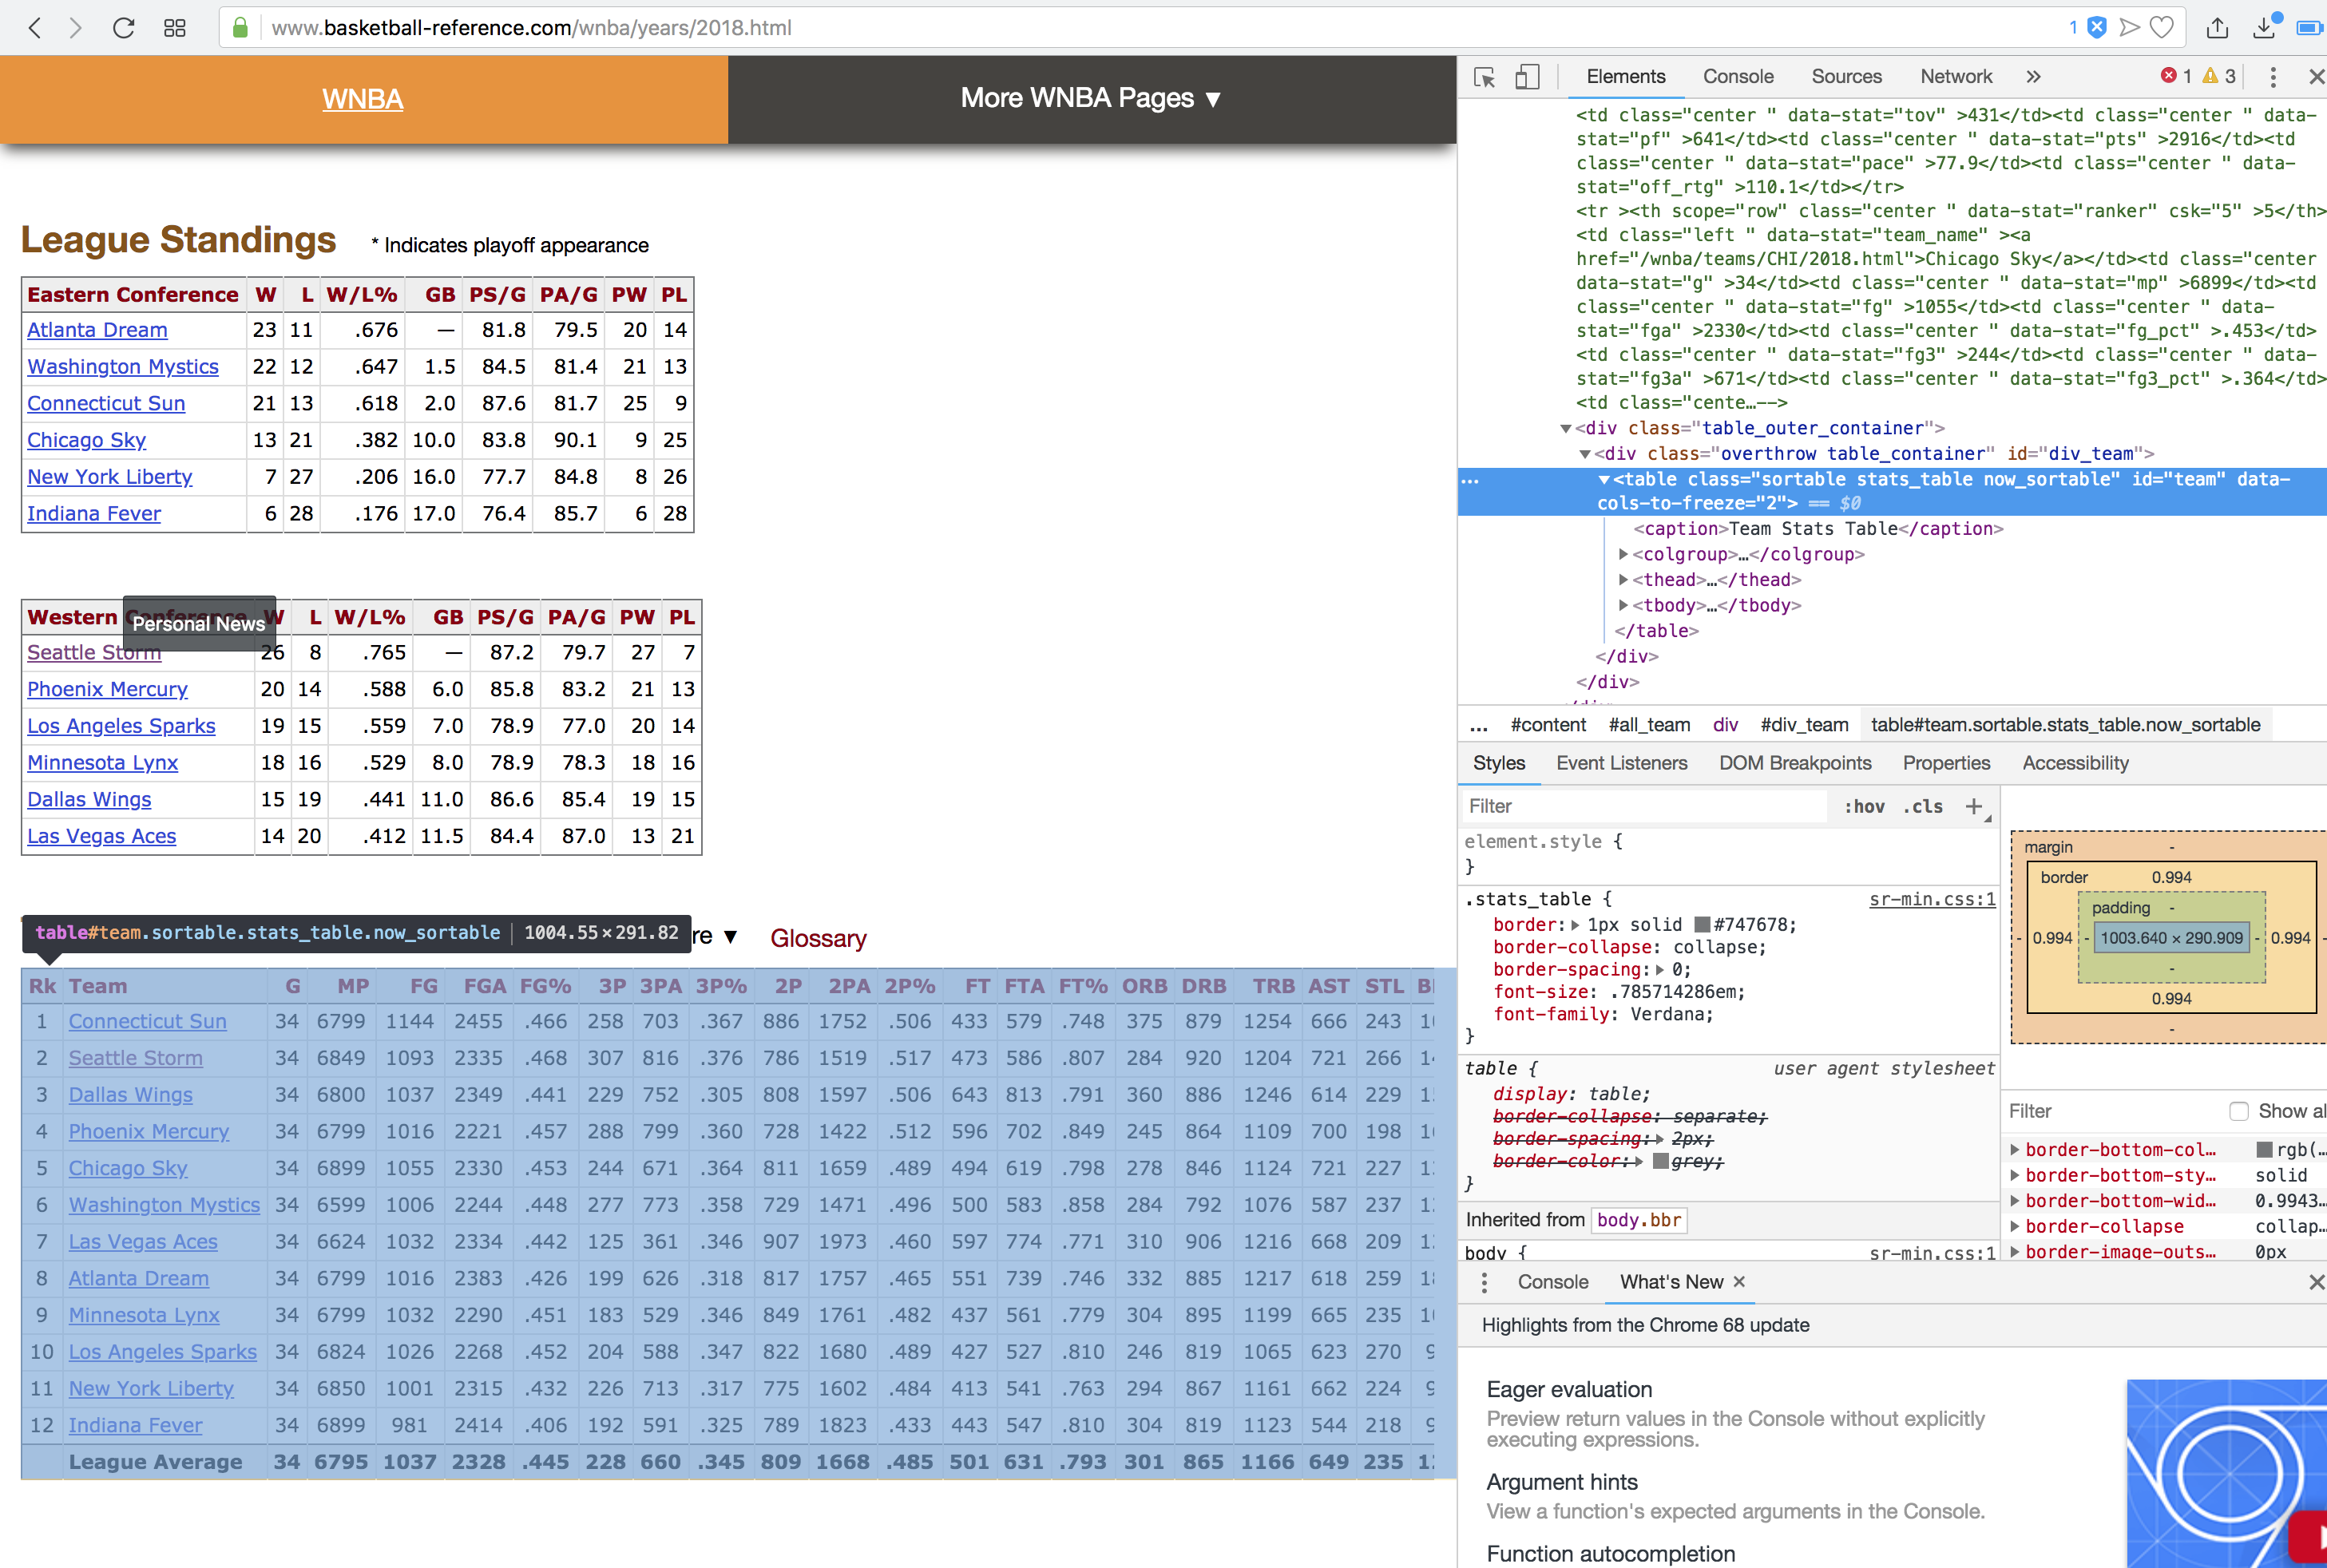

In [32]:
# Getting data
table_html = driver.find_element_by_xpath('//table[@id="team"]')
rows = table_html.text.split('\n')
data = [r.split(' ') for r in rows if 'Rk' not in r and 'Average' not in r]

# Getting column names
headers = rows[0].split(' ')
headers.insert(1, 'City')
# headers

# Trying to combine column names + data
pd.DataFrame(data)
# pd.DataFrame(data, columns=headers)

0            1        2        3     4     5     6     7     8    9   \
0    1  Connecticut      Sun       34  6799  1144  2455  .466   258  703   
1    2      Seattle    Storm       34  6849  1093  2335  .468   307  816   
2    3       Dallas    Wings       34  6800  1037  2349  .441   229  752   
3    4      Phoenix  Mercury       34  6799  1016  2221  .457   288  799   
4    5      Chicago      Sky       34  6899  1055  2330  .453   244  671   
5    6   Washington  Mystics       34  6599  1006  2244  .448   277  773   
6    7          Las    Vegas     Aces    34  6624  1032  2334  .442  125   
7    8      Atlanta    Dream       34  6799  1016  2383  .426   199  626   
8    9    Minnesota     Lynx       34  6799  1032  2290  .451   183  529   
9   10          Los  Angeles   Sparks    34  6824  1026  2268  .452  204   
10  11          New     York  Liberty    34  6850  1001  2315  .432  226   
11  12      Indiana    Fever       34  6899   981  2414  .406   192  591   

    ...      19    20   21   22   23   24    25    26     27     28  
0   ...    1254   666  243  101  441  661  2979  79.1  110.8   None  
1   ...    1204   721  266  149  433  559  2966  77.9  111.1   None  
2   ...    1246   614  229  158  461  631  2946  79.4  109.1   None  
3   ...    1109   700  198  160  431  641  2916  77.9  110.1   None  
4   ...    1124   721  227  132  491  629  2848  79.2  104.2   None  
5   ...    1076   587  237  127  374  606  2789  76.3  110.7   None  
6   ...     906  1216  668  209  128  412   584  2786   80.7  104.1  
7   ...    1217   618  259  180  424  620  2782  79.5  102.9   None  
8   ...    1199   665  235  100  463  563  2684  76.8  102.8   None  
9   ...     819  1065  623  270   96  371   558  2683   75.3  104.4  
10  ...     867  1161  662  224   93  477   703  2641   77.8   99.1  
11  ...    1123   544  218   92  381  634  2597  77.0   97.8   None  

[12 rows x 29 columns]

In [85]:
def parse_html(html):
    rows = html.split('\n')
    data = [r.split(' ') for r in rows[1:]]
    
    # TODO: Add names in here
    #data = [r.split(' ')[-8:] for r in rows[1:]]
    
    team_names_list = [r.split(' ')[1:-8] for r in rows]
    team_names = [' '.join(t) for t in team_names_list]

    headers = rows[0].split(' ')[1:]
    
    #for i, t in enumerate(team_names):
    #    data[i].insert(0, t)
    
    return data, headers

standings_E_html = driver.find_element_by_xpath('//table[@id="standings_E"]')
se_data, se_header = parse_html(standings_E_html.text)
# print(se_data)
# print(se_header)

df = pd.DataFrame(se_data)
# df = pd.DataFrame(se_data, columns=se_header)
df


0        1        2   3     4     5     6     7     8   9     10
0      Atlanta    Dream       23  11  .676     —  81.8  79.5    20  14  None
1   Washington  Mystics       22  12  .647   1.5  84.5  81.4    21  13  None
2  Connecticut      Sun       21  13  .618   2.0  87.6  81.7    25   9  None
3      Chicago      Sky       13  21  .382  10.0  83.8  90.1     9  25  None
4          New     York  Liberty   7    27  .206  16.0  77.7  84.8   8    26
5      Indiana    Fever        6  28  .176  17.0  76.4  85.7     6  28  None

In [ ]:
# Save standings to csv